# Introduction
This notebook is concerned with Fisher's Iris data set. In this notebook, I will be explaining the dataset itself, as well as creating easy on the eye visualisations of the dataset. I will also be discussing why it is difficult to write an algorithm that will accurately separate the three species of iris based on the variables in the dataset.

## What is the Iris dataset?
The Iris dataset was created by British statistician and biologist [Ronald Fisher.](https://en.wikipedia.org/wiki/Ronald_Fisher)
in 1936. The dataset itself consists of 150 samples of three species of Iris(setosa,virginica, virsicolor), with 50 samples for each species. Of this dataset, four features were measured from each sample: sepal length, sepal width, petal length, and petal width. This dataset has become a very popular test case in recent years for the techniques used in machine learning. Lets take a look at the actual dataset to get a better understanding.

## Imports

In [1]:
import numpy as np
import pandas as pd ### so we can read the data from an external url
import seaborn as sns ### so we can style the plots
sns.set_palette('husl') ### set the default seaborn style to husl
import matplotlib.pyplot as plt ### get the plotting package
%matplotlib inline

## Get the dataset

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" ### read in the data from that url
headings = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'] ### give each column a heading 
data = pd.read_csv(url, names=headings) ### save the data to the data variable

## Data observation
So now that we have read in our data and we have a handle on it, lets have a look at what this dataset contains.

In [6]:
data.head(10) ### view thew top 10 records in the dataset

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


As we can see, this dataset is comprised of 6 columns. The first column is simply the ID of the samlple. The subsequent columns are named accoringly as sepel-length, sepal-width, petal-length, petal-width and species respectively. 

In [7]:
data.info() ### print information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
data.describe() ### describe what the dataset contains

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above table, we can get a taste for what the dataset contains. We can see statistical information about the dataset, aswell as each numerical column in the dataset. 

In [9]:
data['species'].value_counts() ### output the count of each species in the dataset 

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

We can see that there are equal numbers of samples for each species(50 for each).

## Data Visualization
Now that we have taken a look at what the dataset contains, I think it's time that we actually graph this data so that we can see for ourselves the relationship between each species and the four variables, sepal-length, sepal-width, petal-length, petal-width.

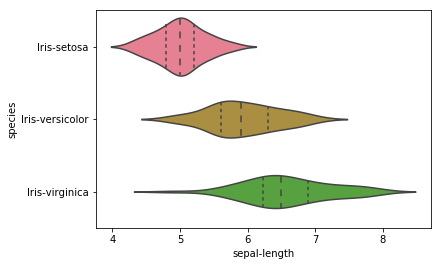

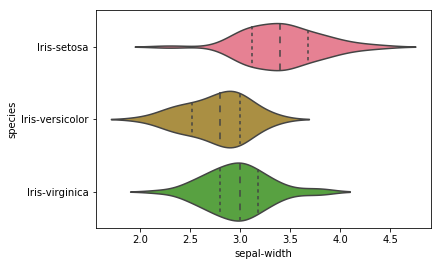

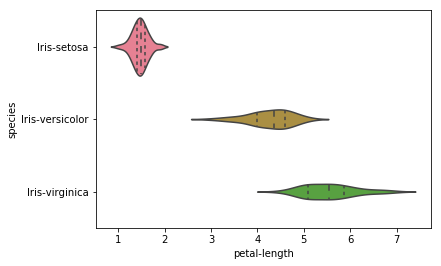

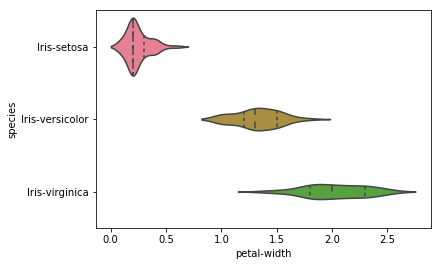

In [11]:
g = sns.violinplot(y='species', x='sepal-length', data=data, inner='quartile') ### sepal length in cm
plt.show()
g = sns.violinplot(y='species', x='sepal-width', data=data, inner='quartile') ### sepal width in cm
plt.show()
g = sns.violinplot(y='species', x='petal-length', data=data, inner='quartile') ### pepal length in cm
plt.show()
g = sns.violinplot(y='species', x='petal-width', data=data, inner='quartile') ### pepal width in cm
plt.show()

Here, we can see the the relationship that each species has with each individual variable. We also get a nice illustration of the distribution of each species accross each individual variable.
Next, let's take a look at the relationships between all four variables with each of the three species.

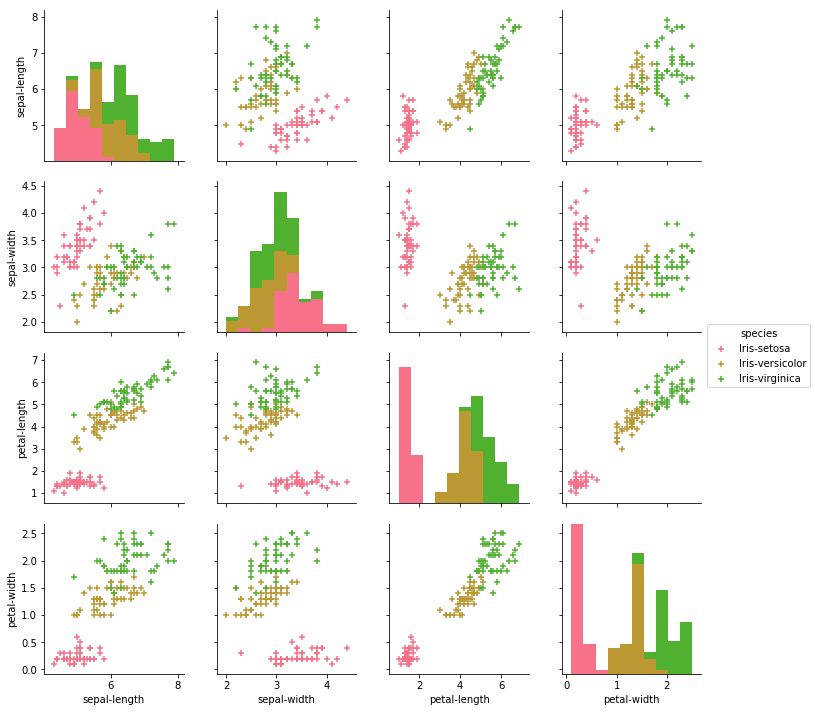

In [10]:
g = sns.pairplot(data, hue='species', markers='+')
plt.show()

In the above plot, you can clearly see that the Iris-setosa(pink) is distinctly different from those of the other two species. This is because there is almots no overlap between the setosa and the other two species for the four variables in question.

## Problems with the dataset
While this may be a fairly extensive dataset, we quickly run into problems when we try to write an algorithm that can accurately predict the species of flower with the four variables we have. This is because of the overlapping that can be seen in the above graph between versicolor and virginica. For example, if you take the (sepal-length,sepal-width) graph, the versicolor and virginica clusters are completely mixed up with eachother making it extremely difficult to construct an algorithm that can percisely differenciate between the two species. The best way to get around this would be to use a neural network.

## Using a Neural Network
In this notebook, I will be using two models to build my neural network- 
*  [LinearDiscriminantAnalysis.](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
*  [KNeighborsClassifier.](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

If you want a detailed explanation of what each of those models does, please feel free to click on one of the links which will bring you to their wikipedia page. However I will give a brief summary of what each of them does on a high level here.

### Linear Discriminant Analysis
Linear discriminant analysis was created by Ronald Fisher in 1936 to characterize or seperate two or more classes of events. This method tries to draw a line of best fit through two of the clusters and estimates that if most of class A lands above the line and most of class B lands below the line, that we can predict the class of an incoming event based on where it lands in relation to the line of best fit.

 ![](img/linear.png)

In this simple picture, we can see that a line of best fit can clearly be drawn between the setosa cluster and the versicolor cluster. Meaning that if another species came in, and its variables placed it above that line we can predict with good percision what it is a setosa. Likewise for the line that can be drawn between versicolor and virginica, however this line would be harder to visualize.

### K Neighbour Classifier
The K neighbour classifier is a form of supervised learning in the machine learning world. On a high level, what this algorithm takes its example dataset of, for example three classes, and predicts the class of an incoming event based on the classes that are situated closest to it on a graph.

![](img/knn.png)


In the above image, we can see clearly that if a sample came through with variables placing it near the bottom left corner of the graph, chances are it is a setosa because all of its closest neighbours on the graph are setosa. This may be obvious on the graph displayed above, but if we had three clusters that had overlapping, this algorithm could become very helpful as it would become difficult to perform linear discriminant analysis.

These are very high level and oversimplified explanations of the above algorithms just so we can understand better the examples that fo 